In [1]:
import pandas as pd
import numpy as np
import warnings
import os
import seaborn as sns
import matplotlib.pyplot as plt
"""
sns 相关设置
@return:
"""
# 声明使用 Seaborn 样式
sns.set()
# 有五种seaborn的绘图风格，它们分别是：darkgrid, whitegrid, dark, white, ticks。默认的主题是darkgrid。
sns.set_style("whitegrid")
# 有四个预置的环境，按大小从小到大排列分别为：paper, notebook, talk, poster。其中，notebook是默认的。
sns.set_context('talk')
# 中文字体设置-黑体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False
# 解决Seaborn中文显示问题并调整字体大小
sns.set(font='SimHei')

In [2]:
# reduce_mem_usage 函数通过调整数据类型，帮助我们减少数据在内存中占用的空间
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [3]:
data = pd.read_csv('cf-df.csv',index_col=0)
data = reduce_mem_usage(data)

Memory usage of dataframe is 384000000.00 MB
Memory usage after optimization is: 98034456.00 MB
Decreased by 74.5%


In [4]:
data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,employmentLength,homeOwnership,annualIncome,verificationStatus,...,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT,creditY
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999999.000000,941459.0,1000000.000000,1.000000e+06,1000000.000000,...,949619.0,949618.0,949619.0,958367.0,912673.0,949619.0,949619.0,949619.0,1000000.0,1000000.000000
mean,499999.500000,14420.845925,3.482534,NaN,NaN,72091.429688,NaN,0.614190,7.619747e+04,1.009832,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,15.804700
std,288675.278932,8720.358533,0.855704,0.000000,NaN,106647.140625,0.0,0.675692,7.077645e+04,0.782519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.508422
min,0.000000,500.000000,3.000000,5.308594,14.007812,0.000000,0.0,0.000000,0.000000e+00,0.000000,...,0.0,1.0,-11.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
25%,249999.750000,8000.000000,3.000000,9.750000,248.500000,427.000000,2.0,0.000000,4.567103e+04,0.000000,...,5.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,2588.0,11.000000
50%,499999.500000,12000.000000,3.000000,12.742188,375.500000,7782.000000,6.0,1.000000,6.500000e+04,1.000000,...,7.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,2984.0,14.000000
75%,749999.250000,20000.000000,3.000000,15.992188,580.500000,118112.000000,10.0,1.000000,9.000000e+04,2.000000,...,10.0,19.0,0.0,0.0,0.0,0.0,0.0,3.0,3318.0,20.000000
max,999999.000000,40000.000000,5.000000,30.984375,1715.000000,378351.000000,10.0,5.000000,1.099920e+07,2.000000,...,83.0,128.0,35.0,28.0,4.0,4.0,39.0,30.0,4200.0,71.000000


## slicing会出问题

In [5]:
from sklearn.model_selection import KFold
# 分离数据集，方便进行交叉验证

train = data[:800000]
test = data[800000:]
test.drop('isDefault',axis=1,inplace=True)

features = [f for f in train.columns if f not in ['id','issueDate','isDefault','earliesCreditLine']]
X_train = train[features]
X_test = test[features]
y_train = train['isDefault']


# 5折交叉验证
folds = 5
seed = 2020
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

F:\Anaconda\envs\kaggle\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
"""对训练集数据进行划分，分成训练集和验证集，并进行相应的操作"""
from sklearn.model_selection import train_test_split
import lightgbm as lgb
# 数据集划分
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2)
train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
valid_matrix = lgb.Dataset(X_val, label=y_val)

params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'bagging_fraction': 0.7,
            'seed': 2020,
}

"""使用训练集数据进行模型训练"""
model = lgb.train(params, train_set=train_matrix, valid_sets=valid_matrix, num_boost_round=20000, verbose_eval=1000, early_stopping_rounds=200)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[374]	valid_0's binary_logloss: 0.443721


未调参前lightgbm单模型在验证集上的AUC：0.731364119104303


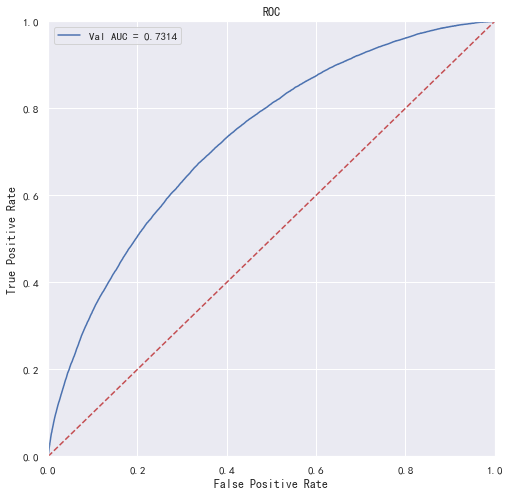

In [7]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

"""预测并计算roc的相关指标"""
val_pre_lgb = model.predict(X_val, num_iteration=model.best_iteration)
fpr, tpr, threshold = metrics.roc_curve(y_val, val_pre_lgb)
roc_auc = metrics.auc(fpr, tpr)
print('未调参前lightgbm单模型在验证集上的AUC：{}'.format(roc_auc))
"""画出roc曲线图"""
plt.figure(figsize=(8, 8))
plt.title('Validation ROC')
plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.4f' % roc_auc)
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend(loc='best')
plt.title('ROC')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 画出对角线
plt.plot([0,1],[0,1],'r--')
plt.show()

### 搞不清楚这两个什么不一样 简单点

In [8]:
import lightgbm as lgb
"""使用lightgbm 5折交叉验证进行建模预测"""
cv_scores = []
for i, (train_index, valid_index) in enumerate(kf.split(X_train, y_train)):
    print('************************************ {} ************************************'.format(str(i+1)))
    X_train_split, y_train_split, X_val, y_val = X_train.iloc[train_index], y_train[train_index], X_train.iloc[valid_index], y_train[valid_index]
    
    train_matrix = lgb.Dataset(X_train_split, label=y_train_split)
    valid_matrix = lgb.Dataset(X_val, label=y_val)

    params = {
                'boosting_type': 'gbdt',
                'objective': 'binary',
                'metric': 'auc',
                'bagging_fraction': 0.7,
                'seed': 2020,
    }
    
    model = lgb.train(params, train_set=train_matrix, num_boost_round=20000, valid_sets=valid_matrix, verbose_eval=1000, early_stopping_rounds=200)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)
    
    cv_scores.append(roc_auc_score(y_val, val_pred))
    print(cv_scores)

print("lgb_scotrainre_list:{}".format(cv_scores))
print("lgb_score_mean:{}".format(np.mean(cv_scores)))
print("lgb_score_std:{}".format(np.std(cv_scores)))

************************************ 1 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[437]	valid_0's auc: 0.735119
[0.7351192038019163]
************************************ 2 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[375]	valid_0's auc: 0.731318
[0.7351192038019163, 0.7313175706785695]
************************************ 3 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[506]	valid_0's auc: 0.734573
[0.7351192038019163, 0.7313175706785695, 0.7345732649172451]
************************************ 4 ************************************
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[473]	valid_0's auc: 0.734317
[0.7351192038019163, 0.7313175706785695, 0.7345732649172451, 0.73

**模型参数已经确定，建立最终模型并对验证集进行验证**

通过5折交叉验证可以发现，模型迭代次数在3600次的时候会停止，那么我们在建立新模型时直接设置最大迭代次数，并使用验证集进行模型预测

还是不会保存模型

In [9]:
"""保存模型到本地"""
# 保存模型
import pickle
# pickle.dump(final_model_lgb, open('model/model_lgb_best.txt', 'wb'))

lgb.save_model('model.txt')

AttributeError: module 'lightgbm' has no attribute 'save_model'

X这里不好！！

In [ ]:
test = pd.read_csv('cf-testa.csv', index_col='id')

In [ ]:
pre = model.predict(X_test)
pd.Series(pre, name='isDefault', index=test.index).reset_index().to_csv('sub_lgb_base.csv', index=False)

In [ ]:
test.index

<Figure size 4320x2880 with 0 Axes>

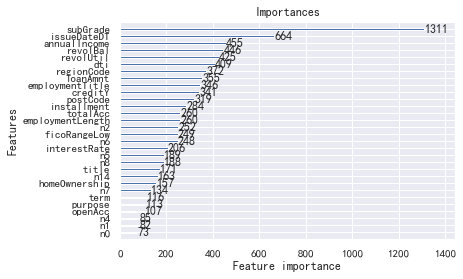

<Figure size 432x288 with 0 Axes>

In [13]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.figure(figsize=(60,40))
lgb.plot_importance(model, max_num_features=30)
plt.title("Importances")
plt.show()
plt.savefig('lgbm_importances-01.png')